## IMPORT OF MY OWN LIBRAY

In [499]:
from google.colab import drive
drive.mount('/content/drive')
import sys

sys.path.append('/content/drive/MyDrive/MY_ONLINE_DATA_NEEDED_FILES/MY_LIBRARY_FOR_OPTIONS_TRADING/')
sys.path.append('/content/drive/MyDrive/MY_ONLINE_DATA_NEEDED_FILES/MY_LIBRARY_FOR_OPTIONS_TRADING/MARKOV_CODE_FOR_LIB/')
import my_library_17 as my_lib
import markov_chains_lib as my_lib_mc

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## SET BASIC AND COMMON PARAMETERS OF ALL FUNCTIONS

In [432]:
import urllib.parse
import pandas as pd
import requests
from IPython.display import display, HTML

apikey='7112261b-c8d0-4e6b-b9cc-7fd1e5c56752'
secretkey='xoxzuh2k62'
rurl=urllib.parse.quote('https://127.0.0.1:5000/',safe="")

uri=f'https://api.upstox.com/v2/login/authorization/dialog?response_type=code&client_id=7112261b-c8d0-4e6b-b9cc-7fd1e5c56752&redirect_uri=https://127.0.0.1:5000/&state=RnJpIERlYyAxNiAyMDIyIDE1OjU4OjUxIEdNVCswNTMwIChJbmRpYSBTdGFuZGFyZCBUaW1lKQ%3D%3D'
uri
display(HTML(f'<a href="{uri}" target="_blank">Click here to open the URL</a>'))

In [433]:
code='dax-A4'

In [434]:
access_token_value=my_lib.get_access_token(code,apikey,secretkey)


               Key                                              Value
0            email                             iit2022231@iiita.ac.in
1        exchanges                     [NSE, BSE, CDS, NFO, BFO, BCD]
2         products                                    [OCO, D, CO, I]
3           broker                                             UPSTOX
4          user_id                                             58AUGK
5        user_name                               LAXMI NARAYAN SHARMA
6      order_types                          [MARKET, LIMIT, SL, SL-M]
7        user_type                                         individual
8              poa                                              False
9        is_active                                               True
10    access_token  eyJ0eXAiOiJKV1QiLCJrZXlfaWQiOiJza192MS4wIiwiYW...
11  extended_token                                               None


In [435]:
import yfinance as yf

import datetime as dt
df_only_options_stock=pd.read_excel("https://drive.google.com/uc?export=download&id=1-_aBkcgF1W9LNUJbpE4rUGlMst4iiaWo")
df=pd.read_csv("https://drive.google.com/uc?export=download&id=1Dyt6laIWQNO4p6FHyw335QG8rKLyeXP1")


# symbol='HAL'
# data=yf.download(tickers='HAL.NS',period='max',interval='1d')
# historical_stock_data=data['Adj Close']
# instrument_key=df[df['Symbol']==symbol]['instrument_key'].values[0]

##  SELECTING STOCKS HAVING UNEXPECTED ATM IV WRT TO ITS PAST HISTORY

In [448]:
# df_only_options_stock=df_only_options_stock[:10]
df_result=my_lib.comparing_atm_iv_with_past_volatility_range(df_only_options_stock,access_token_value)
df_result


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

,SYMBOL,MIN,-2STD,-1STD,MEAN,+1STD,+2STD,MAX,STRIKE_PRICE,ATM_IV
0,AARTIIND,5.466003,-11.730273,12.394340,36.518952,60.643564,84.768176,294.567871,740.0,36.38
1,ABB,7.729927,-196.716477,-79.910143,36.896191,153.702525,270.508859,1873.776609,7700.0,35.42
2,ABBOTINDIA,0.000000,-13.622094,0.852242,15.326578,29.800914,44.275250,94.012873,27000.0,23.67
3,ABCAPITAL,12.551156,5.195299,19.527988,33.860677,48.193366,62.526055,92.983603,212.5,25.88
4,ABFRL,16.551393,7.248824,21.510404,35.771984,50.033565,64.295145,91.188353,325.0,30.03
...,...,...,...,...,...,...,...,...,...,...
174,UPL,0.000000,-2.242751,16.584912,35.412576,54.240239,73.067903,175.455889,565.0,24.66
175,VEDL,0.000000,-57.067762,-3.857864,49.352033,102.561930,155.771827,497.089817,430.0,30.76
176,VOLTAS,10.785728,-439.387291,-192.975113,53.437064,299.849242,546.261420,3941.690443,1580.0,32.53
177,WIPRO,8.401047,-176.075045,-66.935637,42.203770,151.343178,260.482586,1745.330453,490.0,23.93


In [460]:
df_result[(df_result['ATM_IV']>df_result['+1STD']) | (df_result['ATM_IV']<df_result['-1STD'])]

,SYMBOL,MIN,-2STD,-1STD,MEAN,+1STD,+2STD,MAX,STRIKE_PRICE,ATM_IV
8,ALKEM,9.450307,6.030282,14.563590,23.096898,31.630206,40.163514,60.669388,5700.0,33.08
36,BSOFT,9.830369,1.016744,22.055678,43.094612,64.133546,85.172480,131.241180,590.0,136.47
66,GRANULES,6.258907,3.086633,20.114109,37.141584,54.169059,71.196534,111.567575,675.0,15.63
89,INDIACEM,9.184374,-0.158605,22.723093,45.604792,68.486491,91.368189,228.380796,365.0,15.87
146,RBLBANK,10.632534,-6.341990,16.810762,39.963514,63.116267,86.269019,161.312212,215.0,13.18


## INDIVISUAL ANALYSIS ON STOCKS

# DEFINE THE SYMBOL HERE TO ANALYSE

In [504]:
symbol='TCS'
data=yf.download(tickers=f'{symbol}.NS',period='max',interval='1d')
historical_stock_data=data['Adj Close']
instrument_key=df[df['Symbol']==symbol]['instrument_key'].values[0]

[*********************100%%**********************]  1 of 1 completed


In [505]:

current_price=my_lib.get_last_traded_price(access_token_value,instrument_key,symbol)
print(current_price)

4195.65


In [506]:
print(f'linear range for {symbol}  till expiry')
pc,nc,lr,ur=my_lib.linear_range(current_price,historical_stock_data)
print(f'lower bound:{lr},upper bound:{ur} \n')
print(f'exponential range for {symbol} till expiry')
pce,nce,lre,ure=my_lib.exponential_range(current_price,historical_stock_data)
print(f'lower bound:{lre},upper bound:{ure}')

linear range for TCS  till expiry
lower bound:3716.4941029600827,upper bound:4823.09049673272 

exponential range for TCS till expiry
lower bound:3742.842147056699,upper bound:4872.434722250965


In [507]:
num_simulations=10000
print(f'monte carlo  range for {symbol}  till expiry')
lbm,ubm=my_lib.monte_carlo_simulation(current_price,historical_stock_data,num_simulations)
print(f'lower bound  {lbm},upper bound  {ubm}\n')

print(f'geo simulation range for {symbol}  till expiry')
lbg,ubg=my_lib.geometric_brownian_motion_simulation(current_price,historical_stock_data,num_simulations)
print(f'lower bound {lbg},upper bound  {ubg}')

monte carlo  range for TCS  till expiry
lower bound  3409.2336067794026,upper bound  5244.368234750753

geo simulation range for TCS  till expiry


lower bound 3400.0883453219417,upper bound  5257.470194703336


## CALCULATE MAX PAIN POINT and POINTS TO REMBER


*   AS OI CHANGES EVERY DAY SO IS MAX PAIN SO ITS BETTER TO USE IT IN LAST 15 DAYS TO EXPIRY AS

*   ADD SOME BUFFER TO CURRENT MAX PAIN PRICE TO AVOID THE FLUCATIONS IN PAIN PRICE LETS SAY 5% OF VALUE
*   WRITE OPTIONS ABOVE THIS MAX PAIN PRICE + BUFFER



*   AVOID WRITING PUT OPTIONS AS FEAR SPREAD FASTER THAN GREED





4400.0


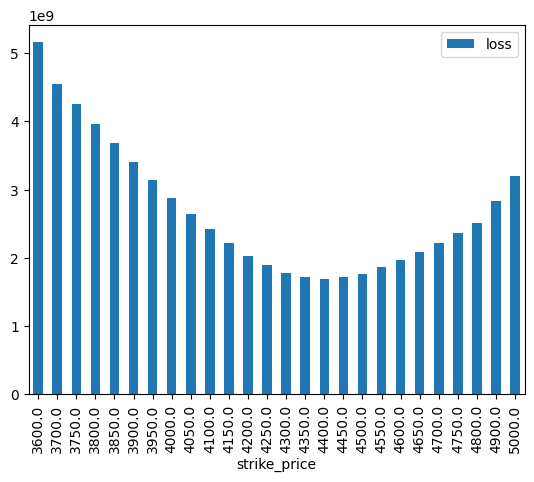

In [508]:
df_call,df_put,df_general=my_lib.import_option_chain_data(instrument_key,access_token_value)
df_loss_corres_to_all_strikes,max_pain_strike=my_lib.max_pain_calculate(df_call,df_put)
df_loss_corres_to_all_strikes.plot(kind='bar',x='strike_price',y='loss')
# df_loss_corres_to_all_strikes.columns
max_pain_strike=max_pain_strike.values[0]
print(max_pain_strike)

In [509]:
df_risk_reward=my_lib.calculate_all_possible_spread_and_max_loss(instrument_key,access_token_value)
# print(df_risk_reward)
from google.colab import sheets
df_risk_reward['max_loss']=df_risk_reward['loss']*2500
df_filtered=df_risk_reward[(df_risk_reward['max_loss']<=6000) & (df_risk_reward['strike_2']<=240) ]

sheet = sheets.InteractiveSheet(df=df_filtered)


/content/drive/MyDrive/MY_ONLINE_DATA_NEEDED_FILES/MY_LIBRARY_FOR_OPTIONS_TRADING/my_library_17.py:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data_frame.drop(index=0,inplace=True)


[3700.0, 3750.0, 3800.0, 3850.0, 3900.0, 3950.0, 4000.0, 4050.0, 4100.0, 4150.0, 4200.0, 4250.0, 4300.0, 4350.0, 4400.0, 4450.0, 4500.0, 4550.0, 4600.0, 4650.0, 4700.0, 4750.0, 4800.0, 4900.0, 5000.0]     strike_price     ltp
0         3700.0  511.30
1         3750.0    0.00
2         3800.0  425.50
3         3850.0  371.50
4         3900.0  314.00
5         3950.0  263.85
6         4000.0  218.95
7         4050.0  175.00
8         4100.0  136.00
9         4150.0   99.00
10        4200.0   69.90
11        4250.0   46.55
12        4300.0   30.30
13        4350.0   20.40
14        4400.0   14.00
15        4450.0    9.50
16        4500.0    7.00
17        4550.0    5.25
18        4600.0    4.00
19        4650.0    3.15
20        4700.0    2.40
21        4750.0    2.20
22        4800.0    1.90
23        4900.0    1.35
24        5000.0    1.25
                 0  loss   profit
24 23   999.000000  0.10    99.90
23 24   999.000000 -0.10   -99.90
24 22   306.692308  0.65   199.35
22 24   306.6

/usr/local/lib/python3.10/dist-packages/google/colab/sheets.py:31: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return frame.applymap(_clean_val).replace({np.nan: None})


## MARKOV CHAINS

# MARKOV ANALYSIS

In [511]:
n_simulations=10000
my_lib_mc.get_price_path_based_on_markov_chain(access_token_value,instrument_key,symbol,n_simulations)

[*********************100%%**********************]  1 of 1 completed
/content/drive/MyDrive/MY_ONLINE_DATA_NEEDED_FILES/MY_LIBRARY_FOR_OPTIONS_TRADING/MARKOV_CODE_FOR_LIB/markov_chains_lib.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  historical_stock_data['pct_chnage']=historical_stock_data['Adj Close'].pct_change().dropna()


Transition Matrix:
[[0.28644689 0.41904762 0.29450549]
 [0.22169293 0.56577501 0.21253206]
 [0.26959707 0.44981685 0.28058608]]
Mean Prices:
4213.590834279703
5th percentile:
3348.6561603550344
95th percentile:
5188.6841224107475
